# Cost Function

In [2]:
#import the libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error as mse

In [3]:
# creating the sample dataset
experience = [1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
salary     = [1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2]

data = pd.DataFrame({
    "salary" : salary,
    "experience"   : experience
})
data.head()

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


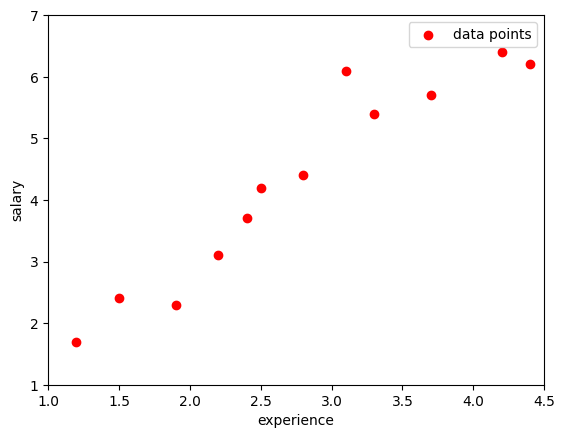

In [4]:
# plotting the data
plt.scatter(data.experience, data.salary, color = 'red', label = 'data points')
plt.xlim(1,4.5)
plt.ylim(1,7)
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()

## Starting the Line using small values of parameters

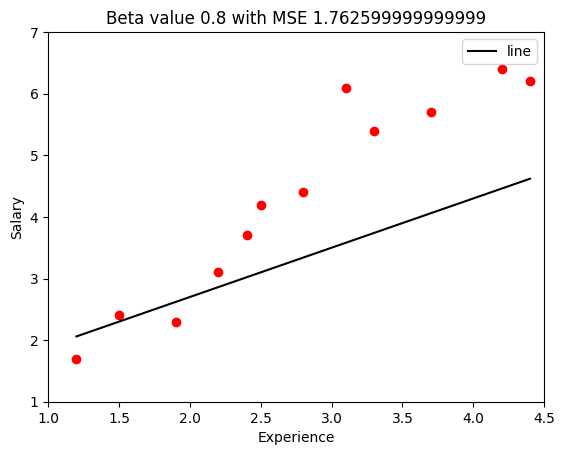

In [5]:
# making lines for different Values of Beta 0.1, 0.8, 1.5
beta = 0.8
# keeping intercept constant
b = 1.1

# to store predicted points
line1 = []

# generating predictions for every data point
for i in range(len(data)):
    line1.append(data.experience[i]*beta + b)

# Plotting the line
plt.scatter(data.experience, data.salary, color = 'red')
plt.plot(data.experience, line1, color = 'black', label = 'line')
plt.xlim(1,4.5)
plt.ylim(1,7)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
MSE = mse(data.salary, line1)
plt.title("Beta value "+str(beta)+" with MSE "+ str(MSE))
MSE = mse(data.salary, line1)

## Computing Cost over a range of values of Beta

In [6]:
# function to calculate error

def Error(Beta, data):
  # b is constant
    b = 1.1
  
    salary = []
    experience  = data.experience
  
  # Loop to calculate predict salary variables
    for i in range(len(data.experience)):
        tmp = data.experience[i] * Beta + b
        salary.append(tmp)
    MSE = mse(data.salary, salary)
    return MSE

In [7]:
# Range of slopes from 0 to 1.5 with increment of 0.01
slope = [i/100 for i in range(0,150)]
Cost = []
for i in slope:
    cost = Error( Beta = i, data = data)
    Cost.append(cost)

In [8]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'Beta' : slope,
    'Cost' : Cost
})
Cost_table.head()

,Beta,Cost
0,0.00,12.791667
1,0.01,12.585876
2,0.02,12.381806
3,0.03,12.179455
4,0.04,11.978824


## Visualising cost with respect to Beta

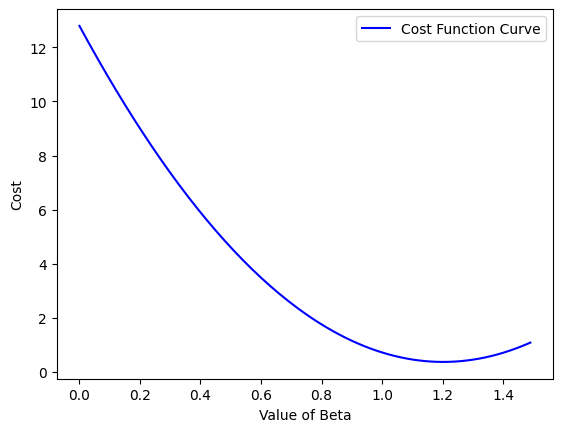

In [9]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.Beta, Cost_table.Cost, color = 'blue', label = 'Cost Function Curve')
plt.xlabel('Value of Beta')
plt.ylabel('Cost')
plt.legend()

## But what if we are given...
# $Y = ß_1X_1 + ß_2X_2 + ß_3X_3 ... + ß_nX_n + b$

# Linear Regression

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data=pd.read_csv("C:\Arun\Data/train_cleaned.csv")
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [12]:
#seperating independent and dependent variables
x = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']
x.shape, y.shape

((8523, 45), (8523,))

### Splitting the data into train set and the test set

In [13]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Splitting the data into train set and the test set

In [14]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [15]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [16]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     875.2688982985255


### Parameters of Linear Regression

In [17]:
lr.coef_

array([ 1.78450035e-01, -3.84642222e+02,  1.54980674e+01, -1.84444754e+01,
       -3.78808067e+01,  3.31502849e+01,  4.06819896e+01,  4.76424149e+01,
       -8.35938826e+01,  2.81126002e+00, -1.19848265e+00, -1.57618523e+02,
        6.71387323e+01, -5.33492180e+01, -3.06556852e+01,  4.23212148e+01,
       -2.30260247e+01, -4.27876198e+01, -7.54301779e+01, -3.65824873e+00,
       -7.87129822e+01,  2.60470952e+02,  1.41600650e+01, -1.46932400e+01,
        9.42279781e+01, -4.64999137e+02, -5.51947683e+01,  1.53301072e+02,
       -4.68181522e+01, -4.71597876e+02,  5.87820902e+02,  1.24396682e+02,
       -8.80903933e+01,  3.17298874e+02, -5.61172040e+01, -5.51947683e+01,
        4.84885546e+02, -2.99023193e+01, -2.10416205e+02,  1.89607361e+02,
        2.08088447e+01, -9.36597012e+02,  3.95594262e+02, -4.68181522e+01,
        5.87820902e+02])

### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

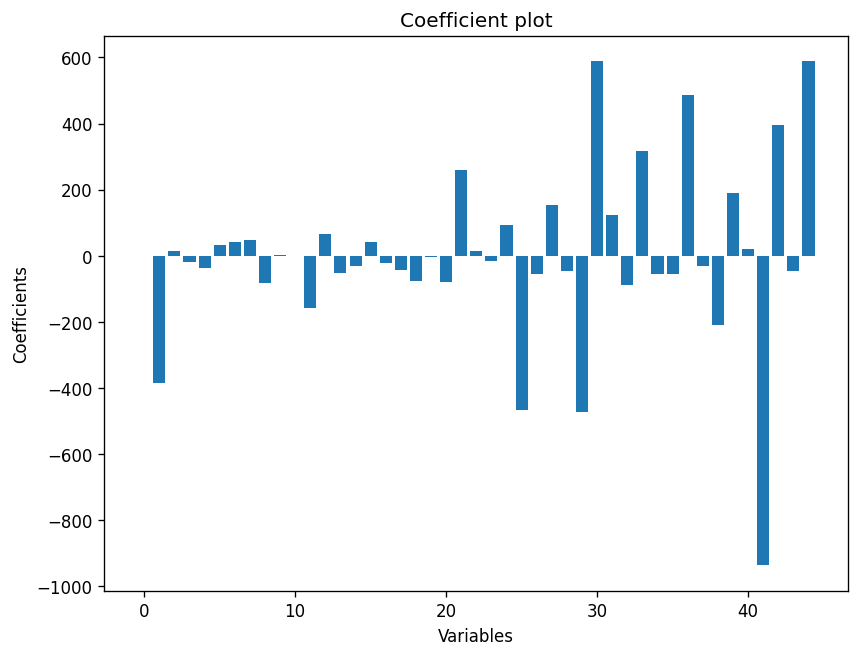

In [18]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

## Checking assumptions of Linear Model
Here we can see that the model depends upon some Independent variables toos much, But these coefficients are not suitable for interpretation because these are not scaled, therefore we will perform the interpretation in this note book later.

In [19]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
2172,697.7584,906.204648,-208.446248
6228,1414.1592,2544.719495,-1130.560295
2404,3078.6592,3008.957438,69.701762
99,1314.2892,3045.197114,-1730.907914
4945,1403.5064,1453.011713,-49.505313


### Plotting residual curve (Is there constant Variance OR Homoscedastic?)

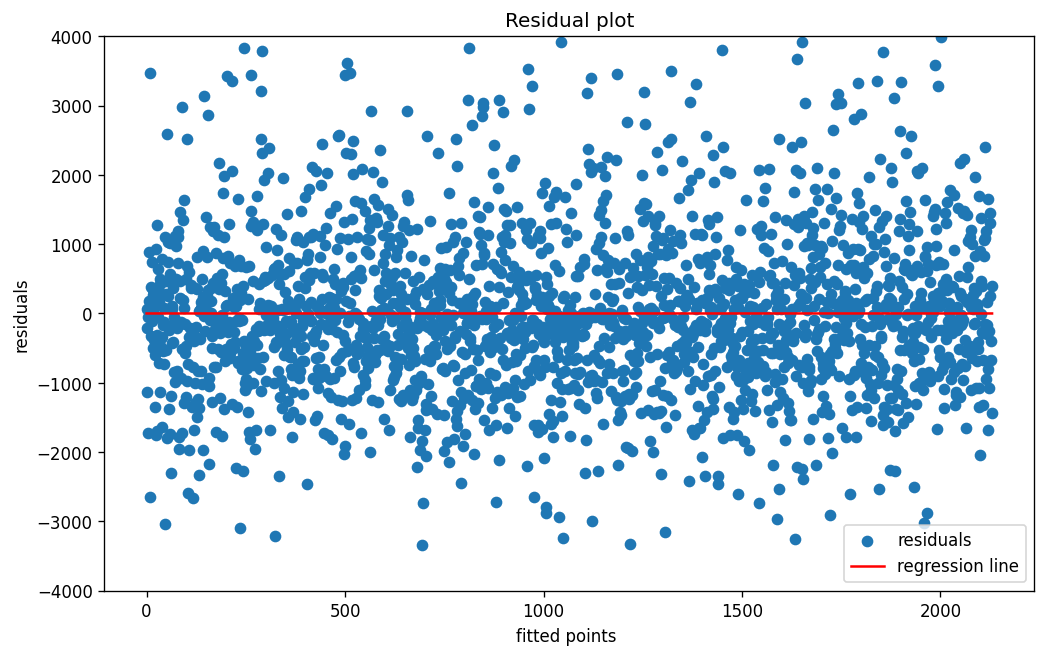

In [20]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,2131)
k = [0 for i in range(0,2131)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

### Checking Distribution of Residuals

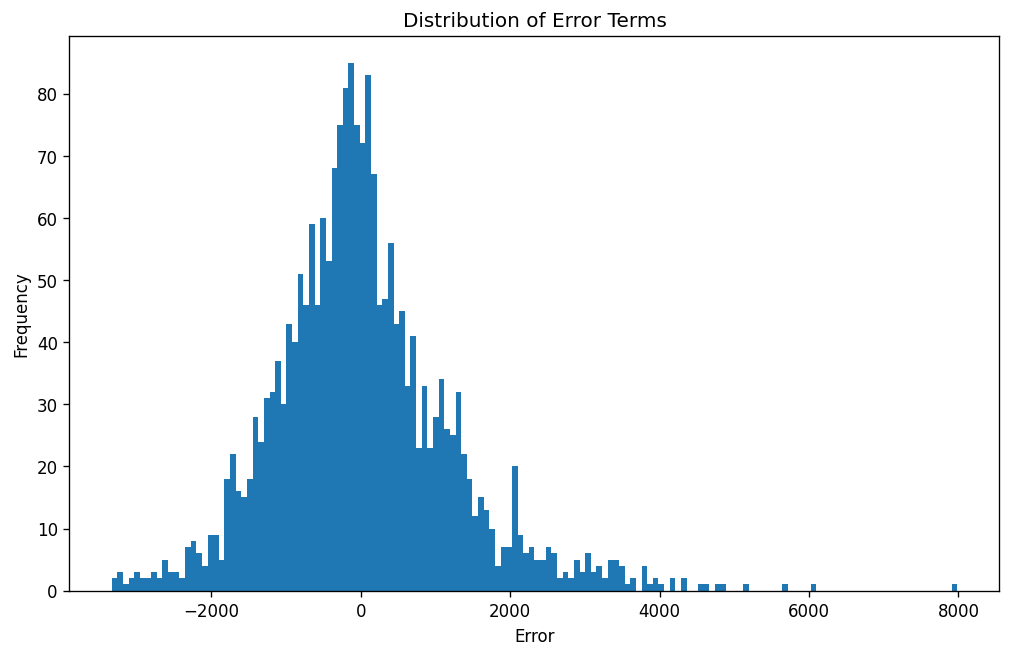

In [21]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

### QQ-Plot (Is the data Normally Distributed?)

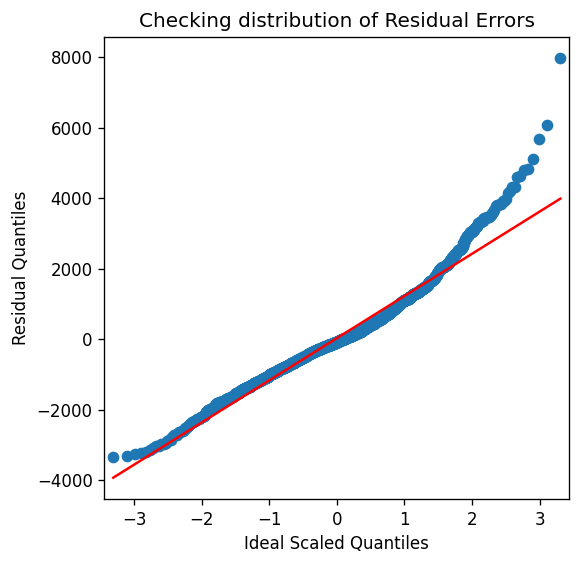

In [22]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

### Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [23]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index =data.columns)
VIF

C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Item_Weight                        2.349925
Item_Visibility                    1.101456
Item_MRP                           1.753170
Outlet_Establishment_Year               inf
Item_Outlet_Sales                  2.292720
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood               

## Model Interpretability

So far we have simply been predicting the values using the linear regression, But in order to Interpret the model, the normalising of the data is essential.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that standardizes the data then applies Linear Regression
lr = make_pipeline(StandardScaler(), LinearRegression())

# Fit the model
lr.fit(train_x, train_y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [26]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 821.4206146753685


In [27]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     875.2688982985248


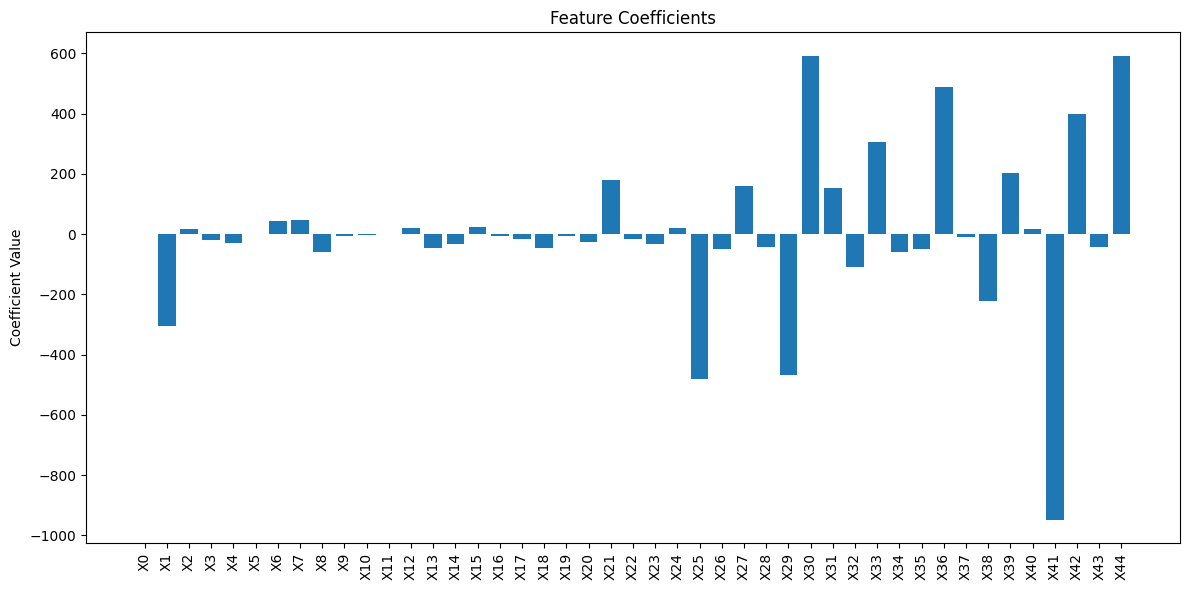

In [50]:
# Get only the correct number of labels
if len(coefs) != len(train_x.columns):
    print("Warning: Coefficient and feature count mismatch!")
    feature_names = [f"X{i}" for i in range(len(coefs))]  # Dummy names
else:
    feature_names = train_x.columns

# Plot
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(coefs))
plt.bar(x_pos, coefs)
plt.xticks(x_pos, feature_names, rotation=90, ha='center')
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients")
plt.tight_layout()
plt.show()

#### Creating new subsets of data

In [29]:
#seperating independent and dependent variables
x = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']
x.shape, y.shape

((8523, 45), (8523,))

#### Arranging coefficients with features

In [30]:
import pandas as pd

# Access the fitted LinearRegression model inside the pipeline
regressor = lr.named_steps['linearregression']

# Create DataFrame of coefficients
coefficients = pd.DataFrame({
    'Variable': train_x.columns,
    'Coefficient': regressor.coef_
})

coefficients.head()


,Variable,Coefficient
0,Item_Weight,1.151727
1,Item_Visibility,-19.972183
2,Item_MRP,956.845395
3,Outlet_Establishment_Year,-38.438806
4,Item_Fat_Content_LF,-12.432157


#### Chossing variables with sigificance greater than 0.5 ( Filtering Significant Features)

In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Example: your data
# x = feature matrix (DataFrame)
# y = target variable

# Fit the model
model = LinearRegression()
model.fit(x, y)

# Create Coefficients DataFrame
Coefficients = pd.DataFrame({
    'Variable': x.columns,
    'coefficient': model.coef_
})

# Filter coefficients greater than 0.5
sig_var = Coefficients[Coefficients['coefficient'] > 0.5]

print(sig_var)


                           Variable  coefficient
2                          Item_MRP    15.563581
6          Item_Fat_Content_Regular    44.338290
7          Item_Fat_Content_low fat    46.873458
11              Item_Type_Breakfast     1.230585
12                 Item_Type_Canned    19.106735
15  Item_Type_Fruits and Vegetables    24.182133
21                Item_Type_Seafood   178.023167
24          Item_Type_Starchy Foods    19.755382
27         Outlet_Identifier_OUT017   159.668711
30         Outlet_Identifier_OUT027   592.629020
31         Outlet_Identifier_OUT035   152.526030
33         Outlet_Identifier_OUT046   304.730078
36               Outlet_Size_Medium   489.356914
39      Outlet_Location_Type_Tier 2   204.159788
40      Outlet_Location_Type_Tier 3    17.271954
42    Outlet_Type_Supermarket Type1   399.503149
44    Outlet_Type_Supermarket Type3   592.629020


#### Extracting the significant subset do independent Variables

In [32]:
subset = data[sig_var['Variable'].values]
subset.head()

,Item_MRP,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Fruits and Vegetables,Item_Type_Seafood,Item_Type_Starchy Foods,Outlet_Identifier_OUT017,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Size_Medium,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3
0,249.8092,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,48.2692,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,141.6180,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,182.0950,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,53.8614,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


#### Splitting the data into train set and the test set

In [33]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

#### Implementing Linear Regression

In [34]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

#### Training Model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

# Create Linear Regression model without normalize
lr = LinearRegression()

# Fit the model on scaled data
lr.fit(train_x_scaled, train_y)

# Make predictions
predictions = lr.predict(test_x_scaled)


#### Predicting over the train set

In [36]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 135973.65369536742


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#### Predicting over the test set

In [37]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     135787.56970582475


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#### Plotting the coefficients

Text(0.5, 1.0, 'Normalized Coefficient plot')

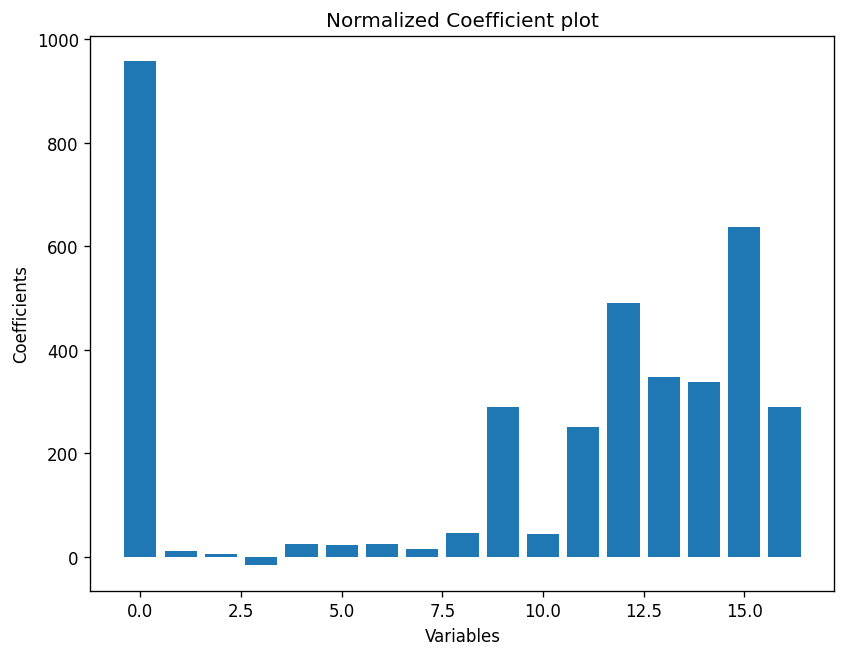

In [38]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

# Logistic Regression

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
data=pd.read_csv("C:\Arun\Data/data_cleaned.csv")
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


### Segregating variables: Independent and Dependent Variables

In [41]:
#seperating independent and dependent variables
x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

### Splitting the data into train set and the test set

In [42]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Normalising using *min_max_scaler*

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [44]:
cols = train_x.columns
cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [45]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.371701,0.024350,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.334004,0.016908,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.396833,0.015127,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.786378,0.152164,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.334004,0.412821,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.396833,0.143462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.359135,0.129995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.367921,0.014110,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.346569,0.025374,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.371701,0.054164,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Implementing Logistic Regression

In [52]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [53]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Making predictions using *predict* function

In [54]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [55]:
# Calculating f1-score
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.7554671968190855


In [56]:
# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )

Test f1_score     0.75


### Making predictions using *predict_proba* function

In [57]:
# Predicting over the Train
train_predict = logreg.predict_proba(train_x)
train_predict

array([[0.5162812 , 0.4837188 ],
       [0.90624521, 0.09375479],
       [0.87147054, 0.12852946],
       ...,
       [0.22969855, 0.77030145],
       [0.31982135, 0.68017865],
       [0.04486775, 0.95513225]], shape=(668, 2))

In [58]:
train_preds = train_predict[:,1]
train_preds

array([0.4837188 , 0.09375479, 0.12852946, 0.78514897, 0.63415489,
       0.11574289, 0.84271042, 0.77048737, 0.53785272, 0.08447781,
       0.10573052, 0.08607139, 0.12285081, 0.09647886, 0.60944443,
       0.08512   , 0.31462499, 0.11919916, 0.07277146, 0.28253296,
       0.10349915, 0.21730089, 0.07471631, 0.58484652, 0.09071932,
       0.51424722, 0.08591896, 0.55521553, 0.6060645 , 0.12685164,
       0.81927853, 0.08610783, 0.59211002, 0.13752953, 0.02369283,
       0.58139044, 0.21643718, 0.12546398, 0.06016576, 0.27948633,
       0.84469177, 0.39452894, 0.21243169, 0.70083945, 0.48264638,
       0.9415654 , 0.36317658, 0.23249065, 0.16492773, 0.89522082,
       0.13084944, 0.63666869, 0.23513163, 0.61262988, 0.3445523 ,
       0.64278379, 0.77513057, 0.28637468, 0.10875959, 0.31056827,
       0.58131787, 0.28637468, 0.12434732, 0.45859808, 0.10584541,
       0.97577661, 0.11616488, 0.08607139, 0.85996844, 0.66115859,
       0.93193818, 0.73999432, 0.89367789, 0.44973934, 0.83529

In [59]:
for i in range(0, len(train_preds)):
  if(train_preds[i]>0.55):
    train_preds[i] = 1
  else:
    train_preds[i] = 0

In [60]:
# Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k )

Training f1_score 0.7396694214876033


# Confusion matrix

In [61]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(test_y, test_predict)
print(cf)

[[128  16]
 [ 22  57]]


In [62]:
from sklearn.metrics import classification_report as rep
print(rep( test_y , test_predict ))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       144
           1       0.78      0.72      0.75        79

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



# Parameters of Logistic Regression

In [63]:
# printing the coefficients
logreg.coef_

array([[-0.03395399,  0.00300304,  1.01949378,  0.13325208, -1.07347638,
         1.18658082, -1.10731134,  0.82509413,  1.01703305,  0.32538735,
        -0.64950484, -0.75529084, -0.27365529, -0.40979409,  0.11286524,
         0.5869607 , -0.19342597,  0.19947773, -0.33391674, -0.13409331,
        -0.15859817,  0.13265366,  0.2368646 , -0.29024878]])

### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

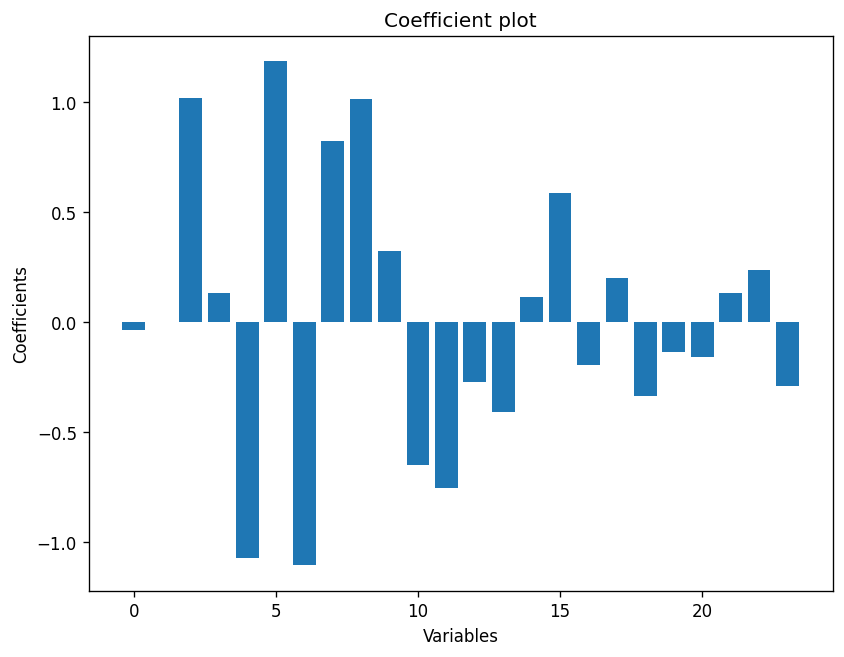

In [64]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [65]:
Coefficients = pd.DataFrame({
    'Variable'    : train_x.columns,
    'coefficient' : abs(c)
})
Coefficients.head()

,Variable,coefficient
0,Age,0.033954
1,Fare,0.003003
2,Pclass_1,1.019494
3,Pclass_2,0.133252
4,Pclass_3,1.073476


In [66]:
#selecting variables with high coefficient
sig_var = Coefficients[Coefficients.coefficient > 0.3]

In [67]:
subset = data[sig_var['Variable'].values]
subset.head()

,Pclass_1,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_8,Parch_1,Parch_4
0,0,1,0,1,0,1,0,0,0,0,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,0,0


In [68]:
# Using train test split function
train_x,test_x,train_y,test_y = train_test_split(subset, y, random_state = 56)

### Implementing Logistic Regression

In [69]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

LogisticRegression()

### Making predictions using *predict* function

In [70]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.701195219123506


Text(0.5, 1.0, 'Coefficient plot')

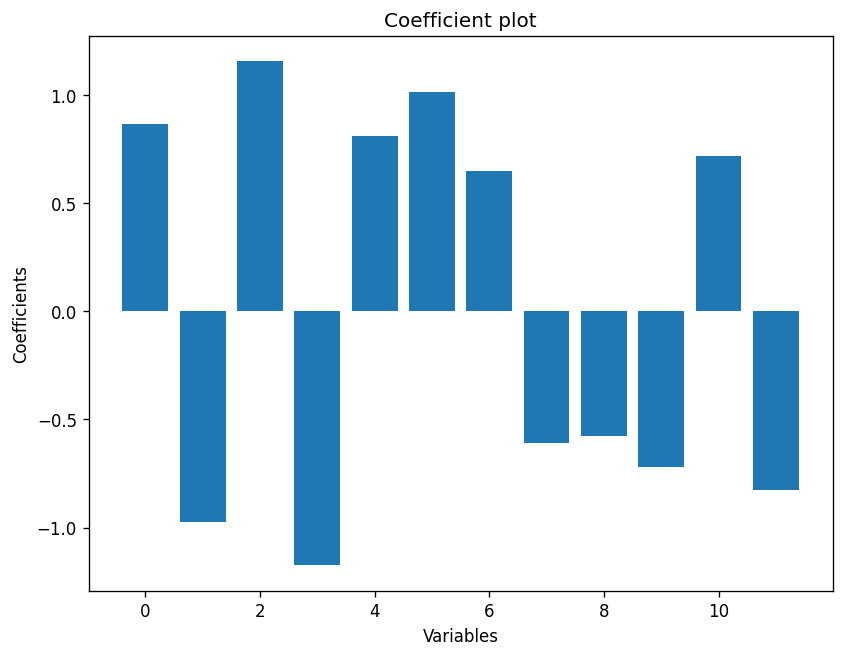

In [71]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [72]:
#Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [73]:
#Defining independent variable as angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(10,360,3)])

In [74]:
#Setting seed for reproducability
np.random.seed(10)  

In [75]:
#Defining the target/dependent variable as sine of the independent variable
y = np.sin(x) + np.random.normal(0,0.15,len(x))

In [76]:
#Creating the dataframe using independent and dependent variable
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

In [77]:
#Printing first 5 rows of the data
data.head()

,x,y
0,0.174533,0.373386
1,0.226893,0.332243
2,0.279253,0.043827
3,0.331613,0.324311
4,0.383972,0.467807


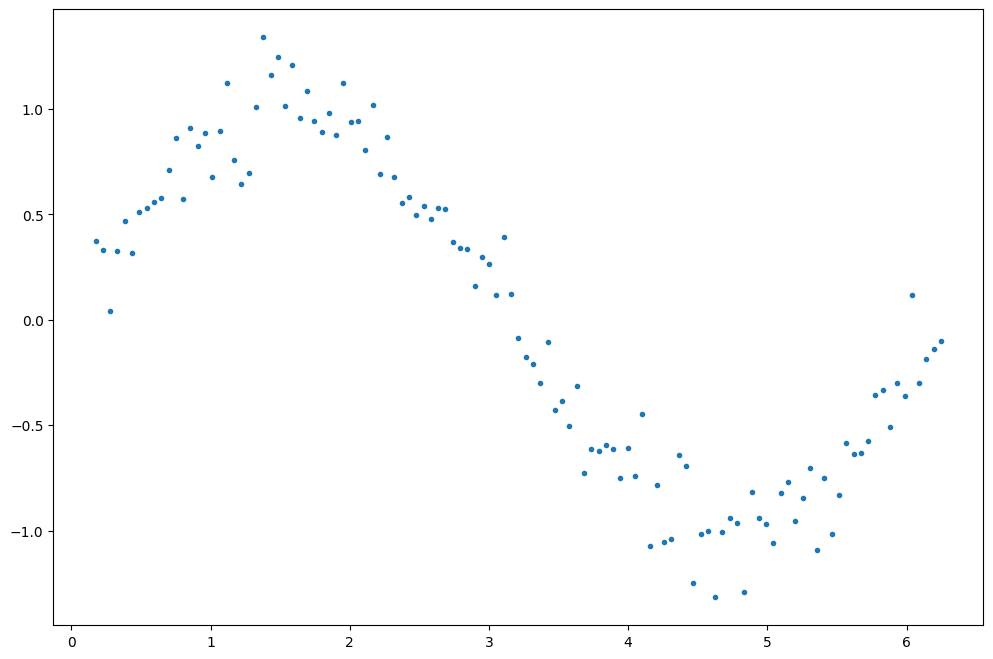

In [78]:
#Plotting the dependent and independent variables
plt.figure(figsize=(12,8))
plt.plot(data['x'],data['y'],'.')

In [79]:
# polynomial regression with powers of x from 1 to 15
for i in range(2,16):  #power of 1 is already there, hence starting with 2
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07


### Creating test and train Set Randomly

In [80]:
data['randNumCol'] = np.random.randint(1, 6, data.shape[0])
train=data[data['randNumCol']<=3]
test=data[data['randNumCol']>3]
train = train.drop('randNumCol', axis=1)
test = test.drop('randNumCol', axis=1)

## Linear Regression

In [91]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [92]:
#Separating the independent and dependent variables
X_train = train.drop('y', axis=1).values
y_train = train['y'].values
X_test = test.drop('y', axis=1).values
y_test = test['y'].values

Training Error (RSS): 0.213144309581739
Testing Error (RSS): 0.18974033118165393


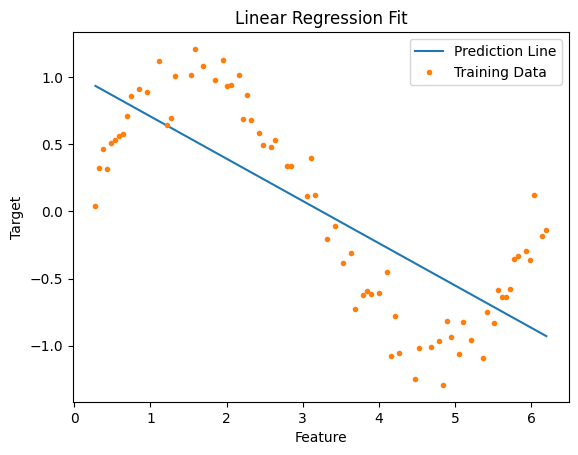

In [98]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Linear regression with one feature
independent_variable_train = X_train[:, 0:1]

# ✅ Removed normalize=True
linreg = LinearRegression()
linreg.fit(independent_variable_train, y_train)

# Predictions on training data
y_train_pred = linreg.predict(independent_variable_train)

# Training RSS (Mean Squared Error)
rss_train = np.sum((y_train_pred - y_train) ** 2) / X_train.shape[0]

# Test data
independent_variable_test = X_test[:, 0:1]
y_test_pred = linreg.predict(independent_variable_test)

# Testing RSS
rss_test = np.sum((y_test_pred - y_test) ** 2) / X_test.shape[0]

# Print errors
print("Training Error (RSS):", rss_train)
print("Testing Error (RSS):", rss_test)

# Plot
plt.plot(X_train[:, 0:1], y_train_pred, label='Prediction Line')
plt.plot(X_train[:, 0:1], y_train, '.', label='Training Data')
plt.legend()
plt.title("Linear Regression Fit")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()


Training Error: 0.0214724817709657
Testing Error: 0.030451878881969072


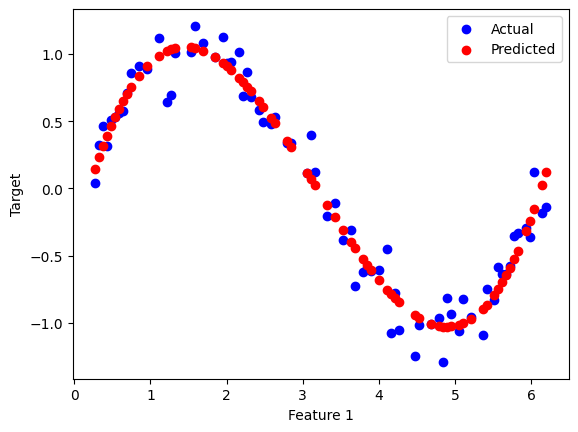

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Select first three features
X_train_subset = X_train[:, 0:3]
X_test_subset = X_test[:, 0:3]

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_subset)
X_test_scaled = scaler.transform(X_test_subset)

# Fit linear regression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

# Predict
y_train_pred = linreg.predict(X_train_scaled)
y_test_pred = linreg.predict(X_test_scaled)

# Compute RSS (mean squared error)
rss_train = ((y_train_pred - y_train) ** 2).mean()
rss_test = ((y_test_pred - y_test) ** 2).mean()

print("Training Error:", rss_train)
print("Testing Error:", rss_test)

# Plot actual vs predicted for first feature
plt.scatter(X_train[:, 0], y_train, color='blue', label='Actual')
plt.scatter(X_train[:, 0], y_train_pred, color='red', label='Predicted')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.show()


Training Error: 0.019095054809245355
Testing Error: 0.027717292848473886


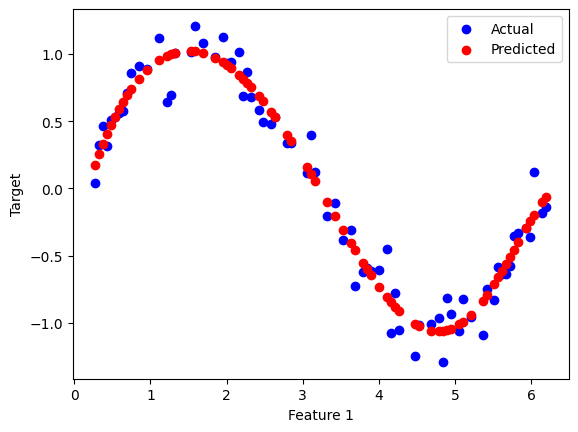

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Select first seven features
X_train_subset = X_train[:, 0:7]
X_test_subset = X_test[:, 0:7]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_subset)
X_test_scaled = scaler.transform(X_test_subset)

# Fit linear regression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

# Predict
y_train_pred = linreg.predict(X_train_scaled)
y_test_pred = linreg.predict(X_test_scaled)

# Compute RSS (mean squared error)
rss_train = ((y_train_pred - y_train) ** 2).mean()
rss_test = ((y_test_pred - y_test) ** 2).mean()

print("Training Error:", rss_train)
print("Testing Error:", rss_test)

# Plot actual vs predicted for first feature
plt.scatter(X_train[:, 0], y_train, color='blue', label='Actual')
plt.scatter(X_train[:, 0], y_train_pred, color='red', label='Predicted')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.show()


In [104]:
# defining a function which will fit linear regression model, plot the results, and return the coefficients
def linear_regression(train_x, train_y, test_x, test_y, features, models_to_plot):
        
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(train_x,train_y)
    train_y_pred = linreg.predict(train_x)
    test_y_pred = linreg.predict(test_x)
    
    #Check if a plot is to be made for the entered features
    if features in models_to_plot:
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        
        plt.plot(train_x[:,0:1],train_y,'.')
        
        plt.title('Number of Predictors: %d'%features)
    
    #Return the result in pre-defined format
    rss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [rss_train]
    
    rss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([rss_test])
    
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    
    return ret

In [105]:
#Initialize a dataframe to store the results:
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['Number_of_variable_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [106]:
#Define the number of features for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

def linear_regression(train_x, train_y, test_x, test_y, features, models_to_plot):
    
    # Scale features
    scaler = StandardScaler()
    train_x_scaled = scaler.fit_transform(train_x)
    test_x_scaled = scaler.transform(test_x)
    
    # Fit the model
    linreg = LinearRegression()  # no normalize parameter
    linreg.fit(train_x_scaled, train_y)
    
    # Predictions
    train_y_pred = linreg.predict(train_x_scaled)
    test_y_pred = linreg.predict(test_x_scaled)
    
    # Compute errors
    rss_train = ((train_y_pred - train_y)**2).mean()
    rss_test = ((test_y_pred - test_y)**2).mean()
    
    # Optionally plot selected models
    if features in models_to_plot:
        import matplotlib.pyplot as plt
        plt.scatter(train_x[:, 0], train_y, color='blue', label='Actual')
        plt.scatter(train_x[:, 0], train_y_pred, color='red', label='Predicted')
        plt.xlabel('Feature 1')
        plt.ylabel('Target')
        plt.title(f'Linear Regression with {features} features')
        plt.legend()
        plt.show()
    
    # Return coefficients and errors (example)
    return np.concatenate([linreg.coef_, [rss_train, rss_test]])


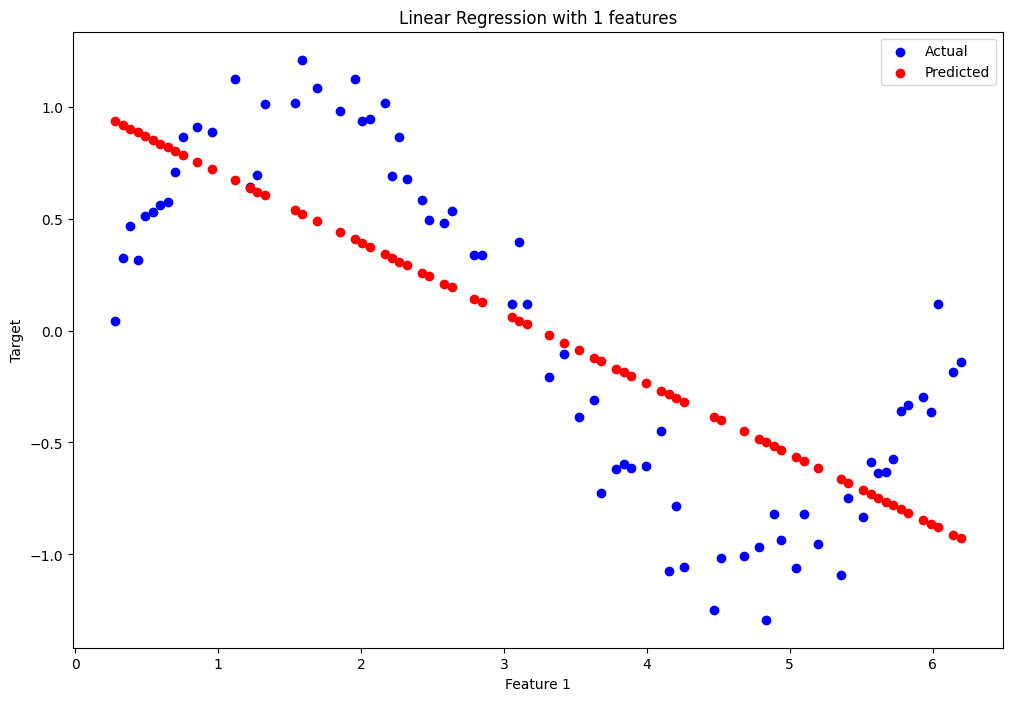

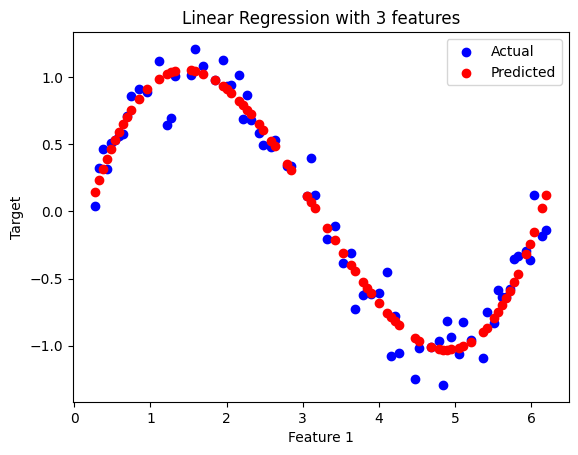

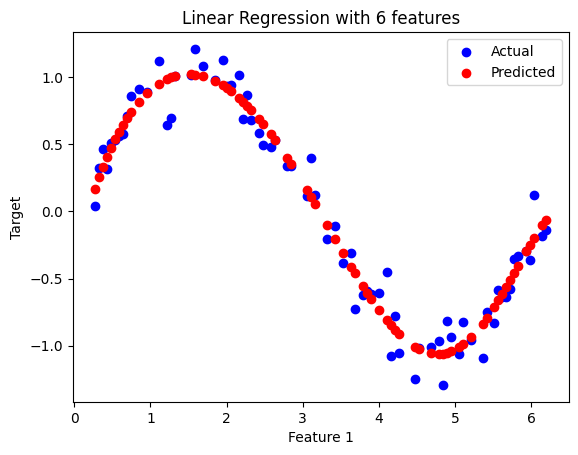

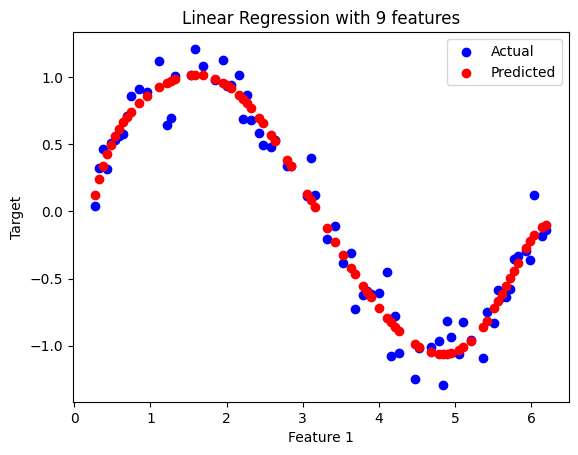

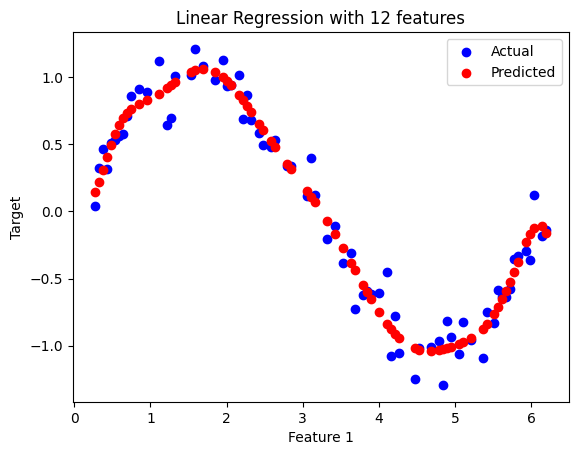

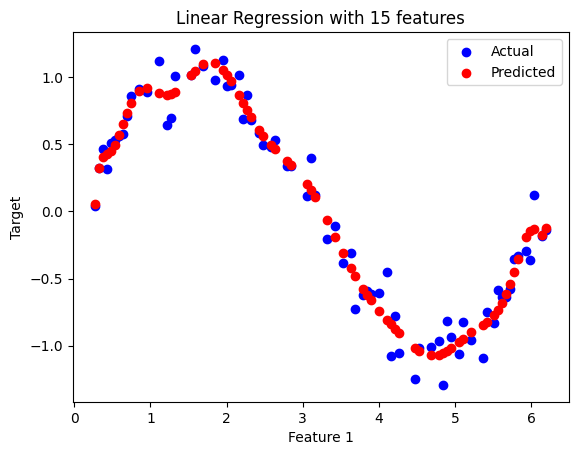

In [109]:
plt.figure(figsize=(12,8))
for i in range(1, 16):
    train_x = X_train[:, 0:i]
    test_x = X_test[:, 0:i]
    
    coef_matrix_simple.iloc[i-1, :i+2] = linear_regression(
        train_x, y_train, test_x, y_test, features=i, models_to_plot=models_to_plot
    )


In [110]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
Number_of_variable_1,-0.58,0.21,0.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_2,-0.72,0.15,0.21,0.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_3,4,-12,7.6,0.021,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_4,4.2,-13,8.5,-0.45,0.021,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_5,2.2,0.1,-21,30,-11,0.02,0.023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_6,4.5,-20,48,-85,80,-28,0.019,0.028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_7,4.3,-18,39,-64,53,-10,-4.6,0.019,0.028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_8,9.3,-85,4.4e+02,-1.3e+03,2.4e+03,-2.4e+03,1.3e+03,-3.1e+02,0.019,0.032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_9,10,-1e+02,5.6e+02,-1.8e+03,3.6e+03,-4.2e+03,2.9e+03,-1.1e+03,1.6e+02,0.019,0.032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_10,30,-4.6e+02,3.6e+03,-1.7e+04,4.8e+04,-9e+04,1.1e+05,-8.1e+04,3.4e+04,-6.3e+03,0.018,0.044,NaN,NaN,NaN,NaN,NaN,NaN


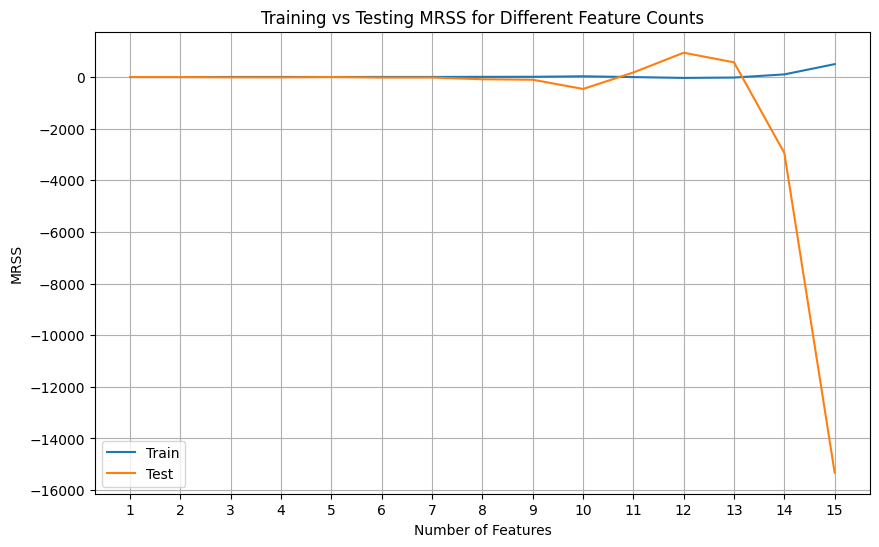

In [115]:
import matplotlib.pyplot as plt

# Plot MRSS
ax = coef_matrix_simple[['mrss_train', 'mrss_test']].plot(figsize=(10,6))
ax.set_xlabel('Number of Features')
ax.set_ylabel('MRSS')
ax.set_title('Training vs Testing MRSS for Different Feature Counts')
ax.set_xticks(range(15))               # 0–14 index
ax.set_xticklabels(range(1,16))        # Feature count 1–15
ax.legend(['Train', 'Test'])
ax.grid(True)
plt.show()

## Ridge

In [116]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

In [117]:
#Set the different values of alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]

In [118]:
# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def ridge_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(train_x,train_y)
    train_y_pred = ridgereg.predict(train_x)
    test_y_pred = ridgereg.predict(test_x)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [mrss_train]
    
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])
    
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    
    return ret

In [119]:
#Initialize the dataframe for storing coefficients.
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

In [120]:
#Define the alpha value for which a plot is required:
models_to_plot = {0:231, 1e-4:232, 1e-3:233, 1e-2:234, 1:235, 5:236}

In [122]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

def ridge_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    
    # Scale features
    scaler = StandardScaler()
    train_x_scaled = scaler.fit_transform(train_x)
    test_x_scaled = scaler.transform(test_x)
    
    # Fit Ridge regression
    ridgereg = Ridge(alpha=alpha)  # remove normalize
    ridgereg.fit(train_x_scaled, train_y)
    
    # Predictions
    train_y_pred = ridgereg.predict(train_x_scaled)
    test_y_pred = ridgereg.predict(test_x_scaled)
    
    # Compute MRSS
    rss_train = ((train_y_pred - train_y)**2).mean()
    rss_test = ((test_y_pred - test_y)**2).mean()
    
    # Optionally plot selected models
    if alpha in models_to_plot:
        plt.scatter(train_x[:, 0], train_y, color='blue', label='Actual')
        plt.scatter(train_x[:, 0], train_y_pred, color='red', label='Predicted')
        plt.xlabel('Feature 1')
        plt.ylabel('Target')
        plt.title(f'Ridge Regression with alpha={alpha}')
        plt.legend()
        plt.show()
    
    # Return coefficients and MRSS
    return np.concatenate([ridgereg.coef_, [rss_train, rss_test]])


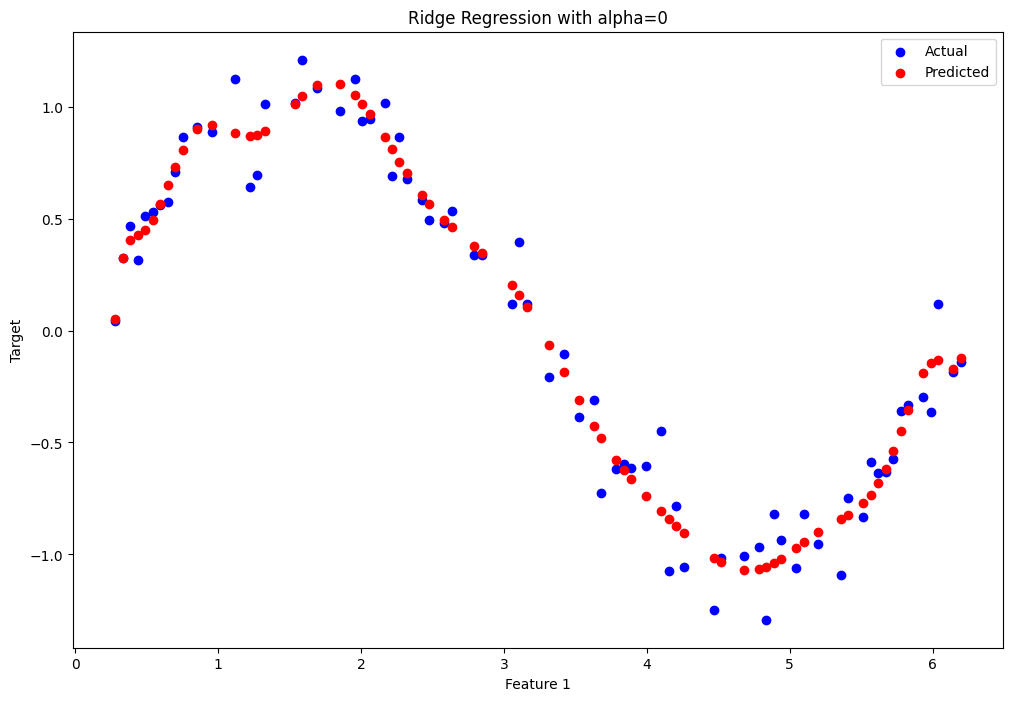

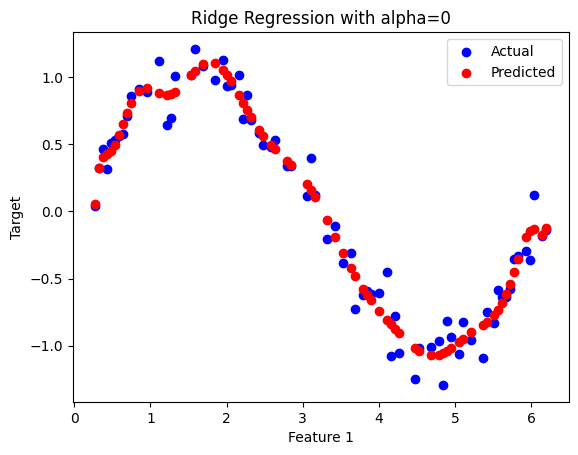

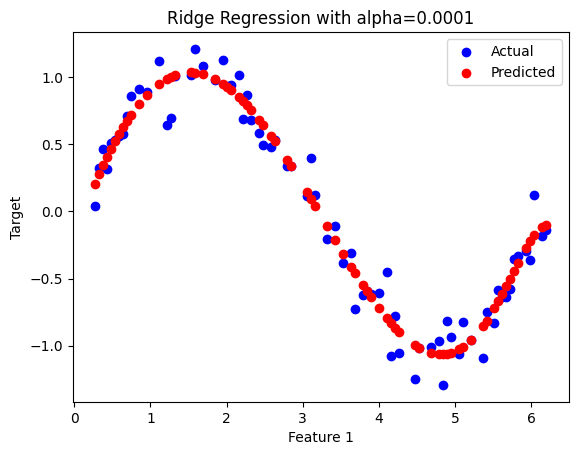

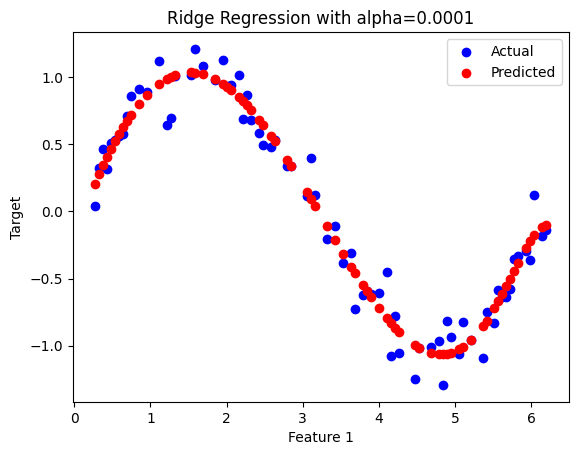

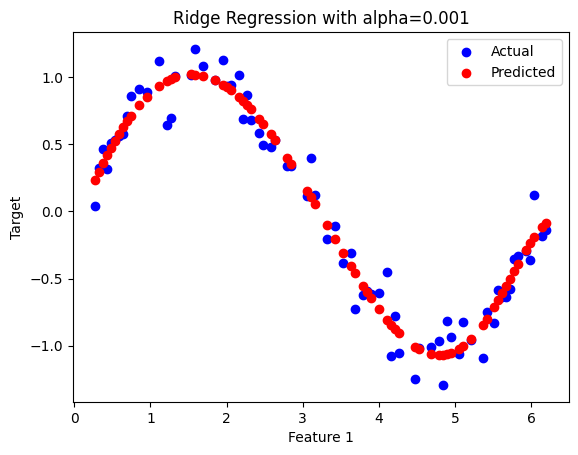

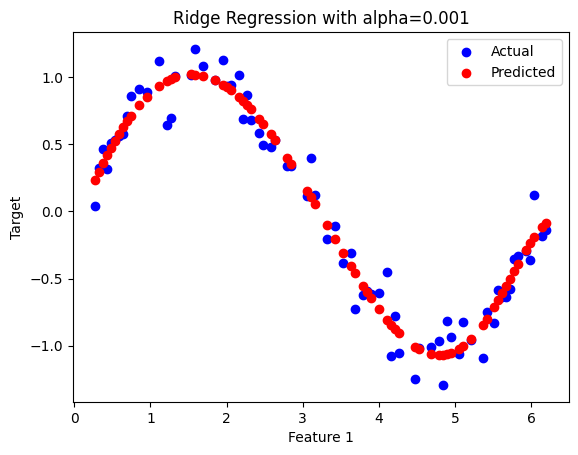

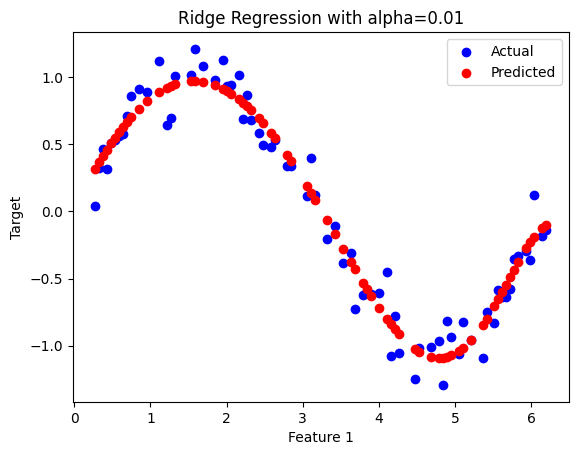

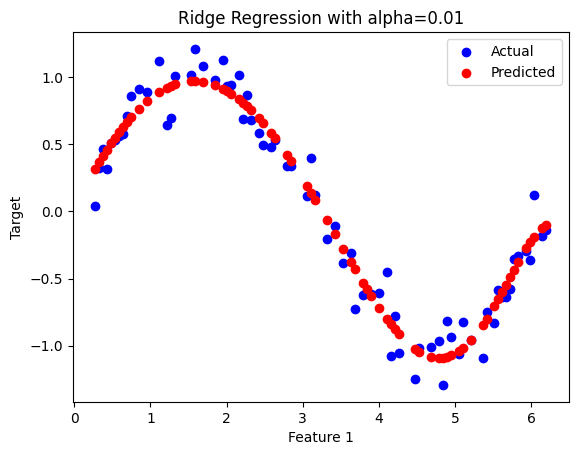

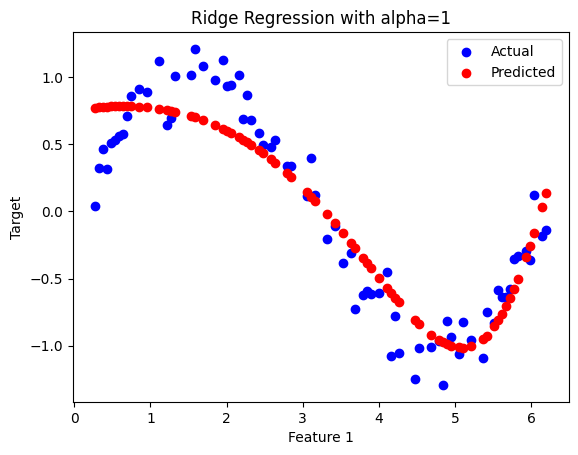

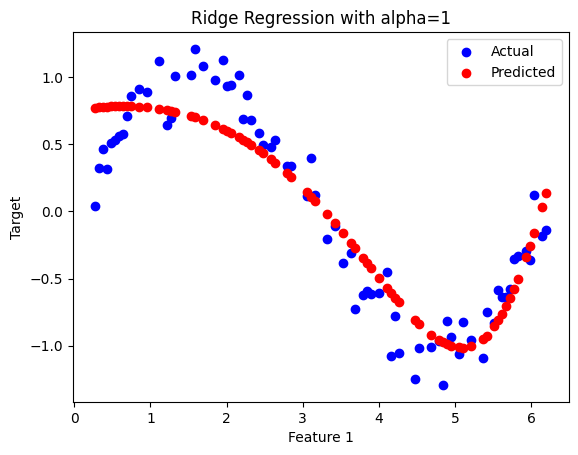

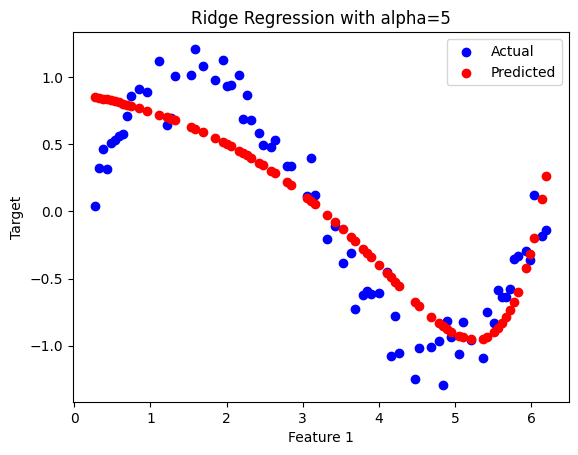

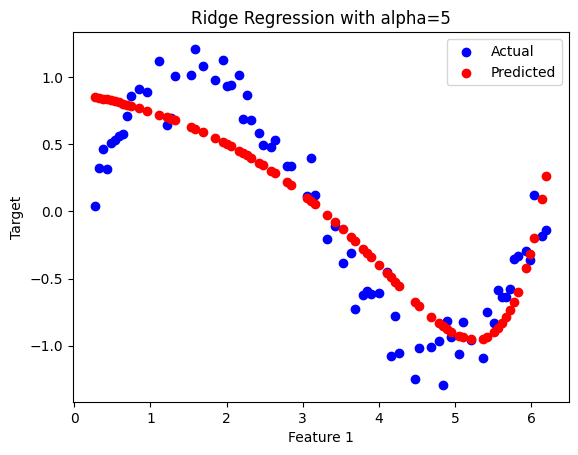

In [123]:
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix_ridge.iloc[i, :len(ridge_regression(train_x, train_y, test_x, test_y, alpha_ridge[i], models_to_plot))] = \
        ridge_regression(train_x, train_y, test_x, test_y, alpha_ridge[i], models_to_plot)


In [124]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
alpha_0,5e+02,-1.5e+04,2.4e+05,-2.3e+06,1.5e+07,-6.8e+07,2.2e+08,-5.4e+08,9.6e+08,-1.3e+09,1.2e+09,-8e+08,3.6e+08,-9.8e+07,1.2e+07,0.016,0.2,NaN
alpha_1e-08,5.2,-30,1e+02,-2.5e+02,3e+02,-47,-2.3e+02,25,2.3e+02,97,-1.8e+02,-2.3e+02,49,3.4e+02,-1.8e+02,0.019,0.029,NaN
alpha_0.0001,3.1,-7,-0.18,1.8,2.2,1.4,0.066,-1.1,-1.5,-0.98,0.12,1.3,1.8,0.85,-2.3,0.019,0.026,NaN
alpha_0.001,2.8,-6,-0.92,1.8,1.9,1.1,0.16,-0.41,-0.56,-0.38,-0.052,0.25,0.37,0.14,-0.54,0.019,0.025,NaN
alpha_0.01,2.2,-4.1,-1.7,0.52,1.4,1.3,0.89,0.37,-0.056,-0.33,-0.44,-0.41,-0.26,-0.035,0.24,0.02,0.026,NaN
alpha_1,0.18,-0.78,-0.68,-0.33,-0.022,0.19,0.3,0.33,0.32,0.26,0.18,0.078,-0.031,-0.15,-0.26,0.067,0.065,NaN
alpha_5,-0.19,-0.39,-0.31,-0.18,-0.06,0.026,0.08,0.11,0.12,0.12,0.1,0.083,0.058,0.029,-0.00078,0.1,0.098,NaN
alpha_10,-0.24,-0.31,-0.24,-0.15,-0.065,-0.0046,0.037,0.064,0.078,0.084,0.084,0.079,0.07,0.06,0.047,0.11,0.11,NaN
alpha_20,-0.24,-0.25,-0.19,-0.12,-0.066,-0.021,0.012,0.036,0.051,0.062,0.068,0.07,0.071,0.069,0.066,0.13,0.12,NaN
alpha_25,-0.23,-0.23,-0.18,-0.12,-0.065,-0.024,0.0067,0.029,0.045,0.055,0.062,0.066,0.068,0.068,0.067,0.13,0.13,NaN


In [125]:
coef_matrix_ridge['mrss_train']

alpha_0        5e+02
alpha_1e-08      5.2
alpha_0.0001     3.1
alpha_0.001      2.8
alpha_0.01       2.2
alpha_1         0.18
alpha_5        -0.19
alpha_10       -0.24
alpha_20       -0.24
alpha_25       -0.23
Name: mrss_train, dtype: object

In [126]:
coef_matrix_ridge['mrss_test'].shape

(10,)

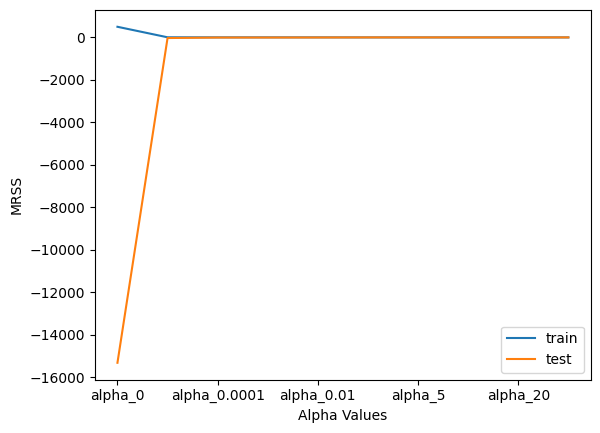

In [127]:
coef_matrix_ridge[['mrss_train','mrss_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

In [128]:
alpha_ridge

[0, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20, 25]

In [129]:
#Printing number of zeros in each row of the coefficients dataset
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_0         0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
alpha_25        0
dtype: int64

## Lasso

In [130]:
#Importing Lasso model from sklearn's linear_model module
from sklearn.linear_model import Lasso

In [131]:
# defining a function which will fit lasso regression model, plot the results, and return the coefficients
def lasso_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    #Fit the model
    if alpha == 0:
        lassoreg = LinearRegression(normalize=True)
        lassoreg.fit(train_x, train_y)
        train_y_pred = lassoreg.predict(train_x)
        test_y_pred = lassoreg.predict(test_x)
        
    else:
        lassoreg = Lasso(alpha=alpha,normalize=True)
        lassoreg.fit(train_x,train_y)
        train_y_pred = lassoreg.predict(train_x)
        test_y_pred = lassoreg.predict(test_x)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [mrss_train]
    
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])
    
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    
    return ret

In [133]:
import numpy as np
import pandas as pd

# Define 10 alpha values for Lasso
alpha_lasso = np.logspace(-4, 1, 10)  # from 0.0001 to 10, 10 values

# Initialize DataFrame to store coefficients
col = ['mrss_train', 'mrss_test', 'intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [134]:
#Define the models to plot
models_to_plot = {0:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

In [141]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

def lasso_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    
    # Scale features
    scaler = StandardScaler()
    train_x_scaled = scaler.fit_transform(train_x)
    test_x_scaled = scaler.transform(test_x)
    
    # Fit Lasso regression
    lassoreg = Lasso(alpha=alpha)
    lassoreg.fit(train_x_scaled, train_y)
    
    # Predictions
    train_y_pred = lassoreg.predict(train_x_scaled)
    test_y_pred = lassoreg.predict(test_x_scaled)
    
    # Compute MRSS
    rss_train = ((train_y_pred - train_y)**2).mean()
    rss_test = ((test_y_pred - test_y)**2).mean()
    
    # Optionally plot selected models
    if alpha in models_to_plot:
        plt.scatter(train_x[:, 0], train_y, color='blue', label='Actual')
        plt.scatter(train_x[:, 0], train_y_pred, color='red', label='Predicted')
        plt.xlabel('Feature 1')
        plt.ylabel('Target')
        plt.title(f'Lasso Regression with alpha={alpha}')
        plt.legend()
        plt.show()
    
    # Return coefficients and MRSS
    return np.concatenate([lassoreg.coef_, [rss_train, rss_test]])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.116e-01, tolerance: 3.983e-03
  model = cd_fast.enet_coordinate_descent(


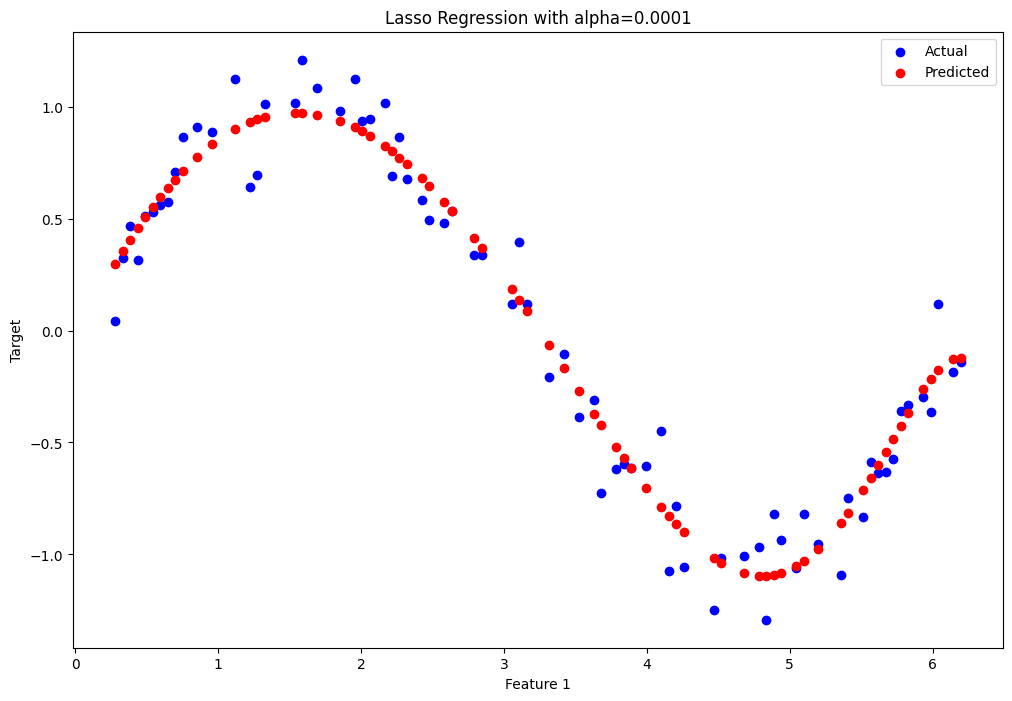

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.488e-01, tolerance: 3.983e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.299e-02, tolerance: 3.983e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.867e-02, toleranc

In [142]:
plt.figure(figsize=(12,8))
for i in range(10):
    results = lasso_regression(train_x, train_y, test_x, test_y, alpha_lasso[i], models_to_plot)
    coef_matrix_lasso.iloc[i, :len(results)] = results


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.116e-01, tolerance: 3.983e-03
  model = cd_fast.enet_coordinate_descent(


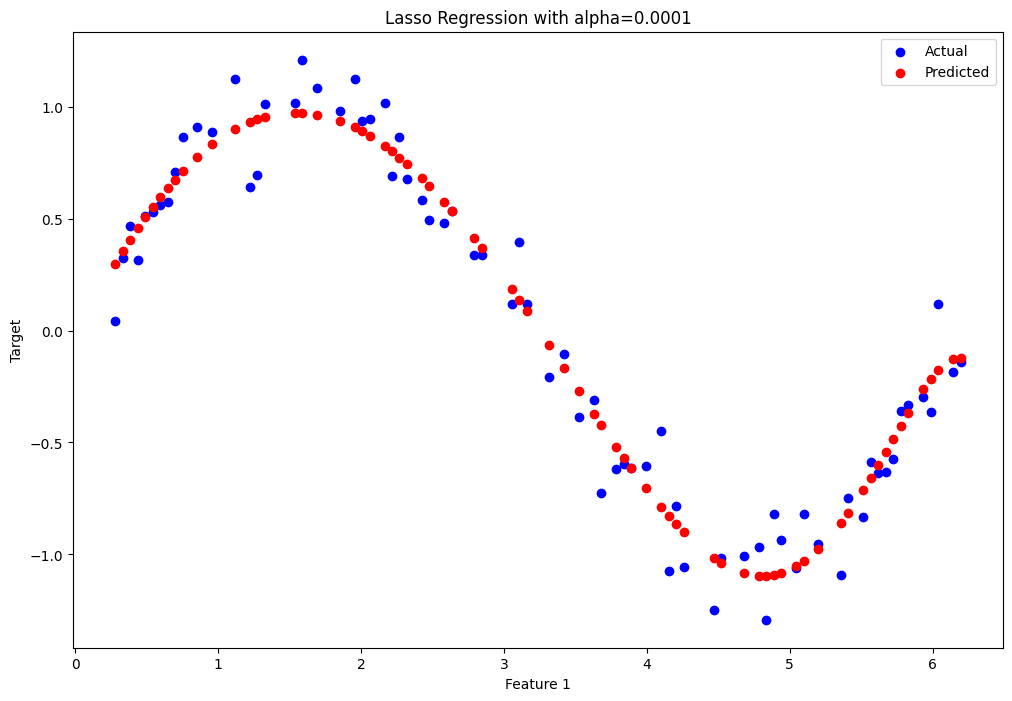

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.116e-01, tolerance: 3.983e-03
  model = cd_fast.enet_coordinate_descent(


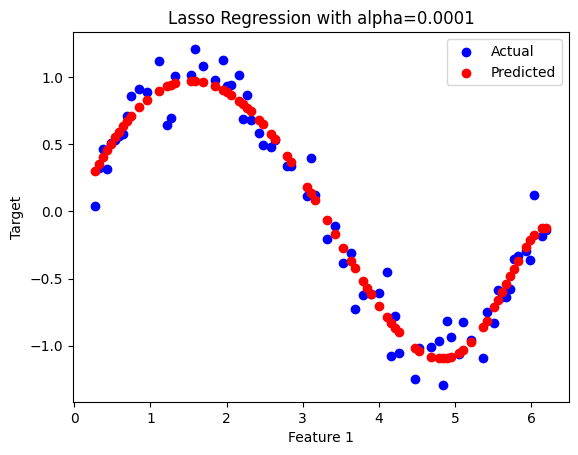

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.488e-01, tolerance: 3.983e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.488e-01, tolerance: 3.983e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.299e-02, toleranc

In [144]:
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix_lasso.iloc[i, :len(lasso_regression(train_x, train_y, test_x, test_y, alpha_lasso[i], models_to_plot))] = \
        lasso_regression(train_x, train_y, test_x, test_y, alpha_lasso[i], models_to_plot)

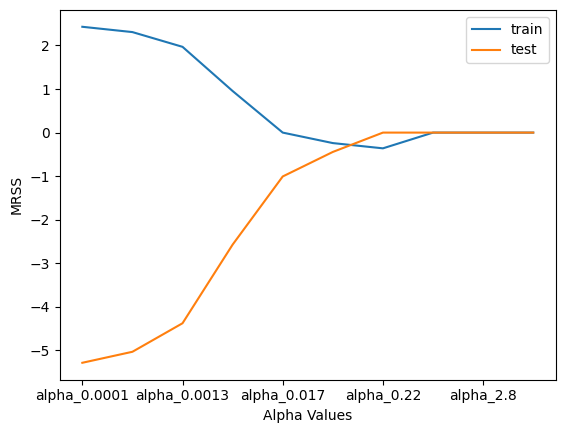

In [139]:
coef_matrix_lasso[['mrss_train','mrss_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

In [140]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_0.0001      2
alpha_0.00036     3
alpha_0.0013      8
alpha_0.0046      9
alpha_0.017      12
alpha_0.06       11
alpha_0.22       14
alpha_0.77       15
alpha_2.8        15
alpha_10         15
dtype: int64